In [89]:
# !pip install sklearn

8277.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     |████████████████████████████████| 31.2 MB 2.6 MB/s eta 0:00:01    |█▏                              | 1.1 MB 680 kB/s eta 0:00:45     |██                              | 2.0 MB 680 kB/s eta 0:00:43     |████████████▉                   | 12.5 MB 2.9 MB/s eta 0:00:07     |█████████████████▏              | 16.8 MB 1.8 MB/s eta 0:00:08     |██████████████████████▉         | 22.3 MB 2.2 MB/s eta 0:00:05     |███████████████████████         | 22.5 MB 2.2 MB/s eta 0:00:05     |████████████████████████        | 23.5 MB 2.2 MB/s eta 0:00:04.5 MB 2.5 MB/s eta 0:00:02     |███████████████████████████████▏| 30.4 MB 2.3 MB/s eta 0:00:01     |███████████████████████████████▌| 30.7 MB 2.6 MB/s eta 0:00:01     |███████████████████████████████▋| 30.8 MB 2.6 MB/s eta 0:00:01
  Using cached scipy-1.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.4 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=

In [90]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging 
from sklearn import preprocessing

sns.set_style("darkgrid")
%matplotlib inline

In [14]:
store = pd.read_csv('../../data/raw/store.csv')
train = pd.read_csv('../../data/raw/train.csv')
test = pd.read_csv('../../data/raw/test.csv')

/tmp/ipykernel_2508/732178704.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../../data/raw/train.csv')


In [15]:
train.shape

(1017209, 9)

In [16]:
test.shape

(41088, 8)

In [17]:
store.shape

(1115, 10)

In [18]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
store.shape

(1115, 10)

In [ ]:
store.set_index('Store', inplace=True, drop=True)

In [ ]:
merged_train = train.merge(store, how='left', on='Store')
merged_test = test.merge(store, how='left', on='Store')

In [33]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [32]:
print(f"StoreType {len(merged_train['StoreType'].unique())}")
print(f"Assortment {len(df['Assortment'].unique())}")
print(f"CompetitionOpenSinceMonth {len(df['CompetitionOpenSinceMonth'].unique())}")
print(f"Promo2 {len(df['Promo2'].unique())}")
print(f"Promo2SinceWeek {len(df['Promo2SinceWeek'].unique())}")
print(f"Promo2SinceYear {len(df['Promo2SinceYear'].unique())}")
print(f"PromoInterval {len(df['Promo2SinceYear'].unique())}")

StoreType 4
Assortment 3
CompetitionOpenSinceMonth 13
Promo2 2
Promo2SinceWeek 25
Promo2SinceYear 8
PromoInterval 8


# Check and Handle missing values

## Check for missing values

In [52]:
## for train
merged_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

It is showing that we do have some null values in our dataset. 

In [39]:
merged_test.isnull()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41084,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
41085,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
41086,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True


## Visualizing the missing values

In [50]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [49]:

train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [48]:
store.isnull().sum()

StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<AxesSubplot:>

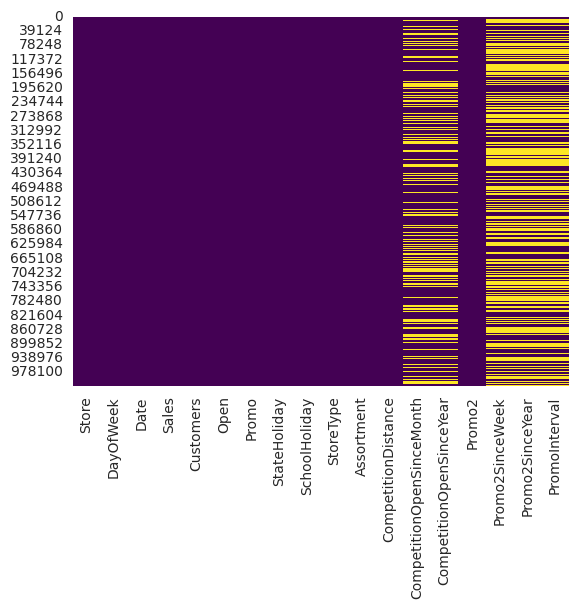

In [37]:
sns.heatmap(merged_train.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

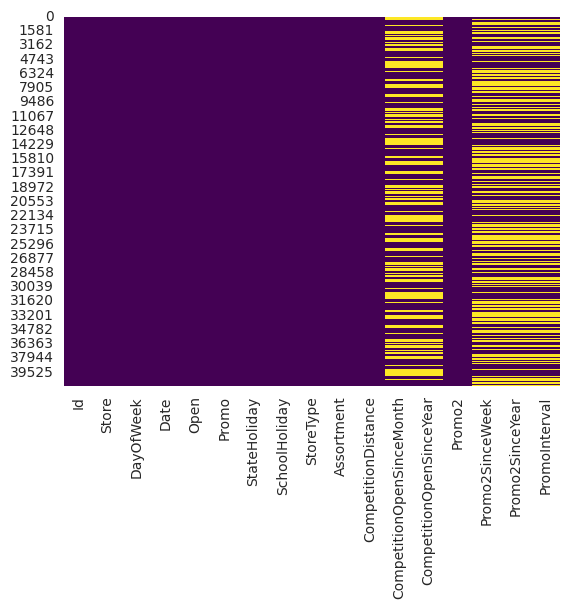

In [38]:

sns.heatmap(merged_test.isnull(),cbar=False,cmap='viridis')

It is showing that we do have some null values in our dataset. 

## Replacing the missing values

In [ ]:
# num_col = ['normalized_losses', 'bore',  'stroke', 'horsepower', 'peak_rpm','price']
# for col in num_col:
#     auto[col]=pd.to_numeric(auto[col])
#     auto[col].fillna(auto[col].mean(), inplace=True)
# auto.head()

In [51]:
merged_train['CompetitionDistance'].fillna(merged_train['CompetitionDistance'].median(), inplace = True)
merged_test['CompetitionDistance'].fillna(merged_test['CompetitionDistance'].median(), inplace = True)

In [53]:
train_no_null = merged_train.fillna(0)
test_no_null = merged_test.fillna(0)

## check duplicates

In [56]:
train_no_null.duplicated().sum()

0

In [57]:

test_no_null.duplicated().sum()

0

## Get statistical informmation about datasets

In [64]:
test_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

In [62]:
train_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [67]:
## change date type
train_no_null['Date'] = pd.to_datetime(train_no_null["Date"])
test_no_null['Date'] = pd.to_datetime(test_no_null["Date"])

In [61]:
train_no_null.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [65]:

test_no_null.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854094,0.395833,0.443487,5082.359813,4.429907,1264.787383,0.580607,14.182243,1168.078271
std,11861.228267,320.274496,2.015481,0.353017,0.489035,0.496802,7218.187006,4.214484,969.984740,0.493466,16.177932,992.765386
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6435.000000,9.000000,2011.000000,1.000000,31.000000,2012.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


# Feature engineering

## Feature Creation

In [69]:
train_no_null['year'] = train_no_null['Date'].dt.year
test_no_null['year'] = test_no_null['Date'].dt.year
train_no_null[['Date','year']][:5]

,Date,year
0,2015-07-31,2015
1,2015-07-31,2015
2,2015-07-31,2015
3,2015-07-31,2015
4,2015-07-31,2015


In [71]:
train_no_null['month'] = train_no_null['Date'].dt.month
test_no_null['month'] = test_no_null['Date'].dt.month
train_no_null[['Date','month']][:5]

,Date,month
0,2015-07-31,7
1,2015-07-31,7
2,2015-07-31,7
3,2015-07-31,7
4,2015-07-31,7


In [ ]:

train_no_null['day'] = train_no_null['Date'].dt.day
test_no_null['day'] = test_no_null['Date'].dt.day
train_no_null[['Date','day']][:5]

In [72]:
train_no_null['weekday'] =train_no_null['Date'].dt.strftime('%A')  
test_no_null['weekday'] =test_no_null['Date'].dt.strftime('%A')  
train_no_null[['Date','weekday']].sample(5)

,Date,weekday
660636,2013-11-16,Saturday
984554,2013-01-30,Wednesday
588689,2014-01-20,Monday
562892,2014-02-12,Wednesday
485212,2014-04-23,Wednesday


## Transformations

In [79]:
# transform objects to integers
train_no_null["CompetitionOpenSinceMonth"] = train_no_null["CompetitionOpenSinceMonth"].astype(int)
train_no_null["CompetitionOpenSinceYear "] = train_no_null["CompetitionOpenSinceYear"].astype(int)

train_no_null["Promo2SinceWeek"] = train_no_null["Promo2SinceWeek"].astype(int)
train_no_null["Promo2SinceYear"] = train_no_null["Promo2SinceYear"].astype(int)

test_no_null["CompetitionOpenSinceMonth"] = test_no_null["CompetitionOpenSinceMonth"].astype(int)
test_no_null["CompetitionOpenSinceYear "] = test_no_null["CompetitionOpenSinceYear"].astype(int)

test_no_null["Promo2SinceWeek"] = test_no_null["Promo2SinceWeek"].astype(int)
test_no_null["Promo2SinceYear"] = test_no_null["Promo2SinceYear"].astype(int)

In [81]:
train_no_null.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,weekday,CompetitionOpenSinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9,2008.0,0,0,0,0,2015,7,Friday,2008
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,Friday,2007
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,Friday,2006
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9,2009.0,0,0,0,0,2015,7,Friday,2009
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4,2015.0,0,0,0,0,2015,7,Friday,2015


In [88]:
# train_no_null.info()
# train_no_null["StateHoliday"].unique()
# StoreType
# train_no_null["StoreType"].unique()
# Assortment
# train_no_null["Assortment"].unique()
# PromoInterval
train_no_null["PromoInterval"].unique()
# weekday

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [101]:
## label encoder
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# # weekday
train_no_null["weekday"] = label_encoder.fit_transform(train_no_null["weekday"])


In [98]:
def clean_data(data):
    
    label1 = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    label2 = {'0':0, 'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3}
    data.StoreType.replace(label1, inplace=True)
    data.Assortment.replace(label1, inplace=True)
    data.StateHoliday.replace(label1, inplace=True)
    data.PromoInterval.replace(label2, inplace=True)
    data['StoreType'] = data['StoreType'].astype(int)
    data['Assortment'] = data['Assortment'].astype(int)
    data['StateHoliday'] = data['StateHoliday'].astype(int)
    data['PromoInterval'] = data['PromoInterval'].astype(int)
    
    return data

In [99]:
train_no_null = clean_data(train_no_null)
test_no_null =clean_data(test_no_null)

In [102]:
train_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

## Univariate and Buvarlate Data Analysis

### Univariate Analysis

In [108]:
train_no_null.Sales

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

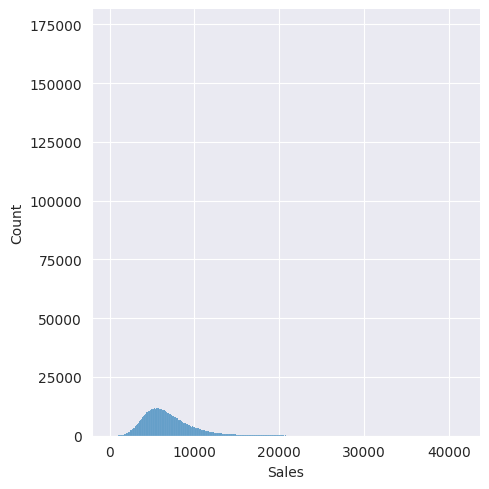

In [113]:
sns.displot(train_no_null["Sales"])

/tmp/ipykernel_2508/1058411809.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_no_null.hist(ax = ax);


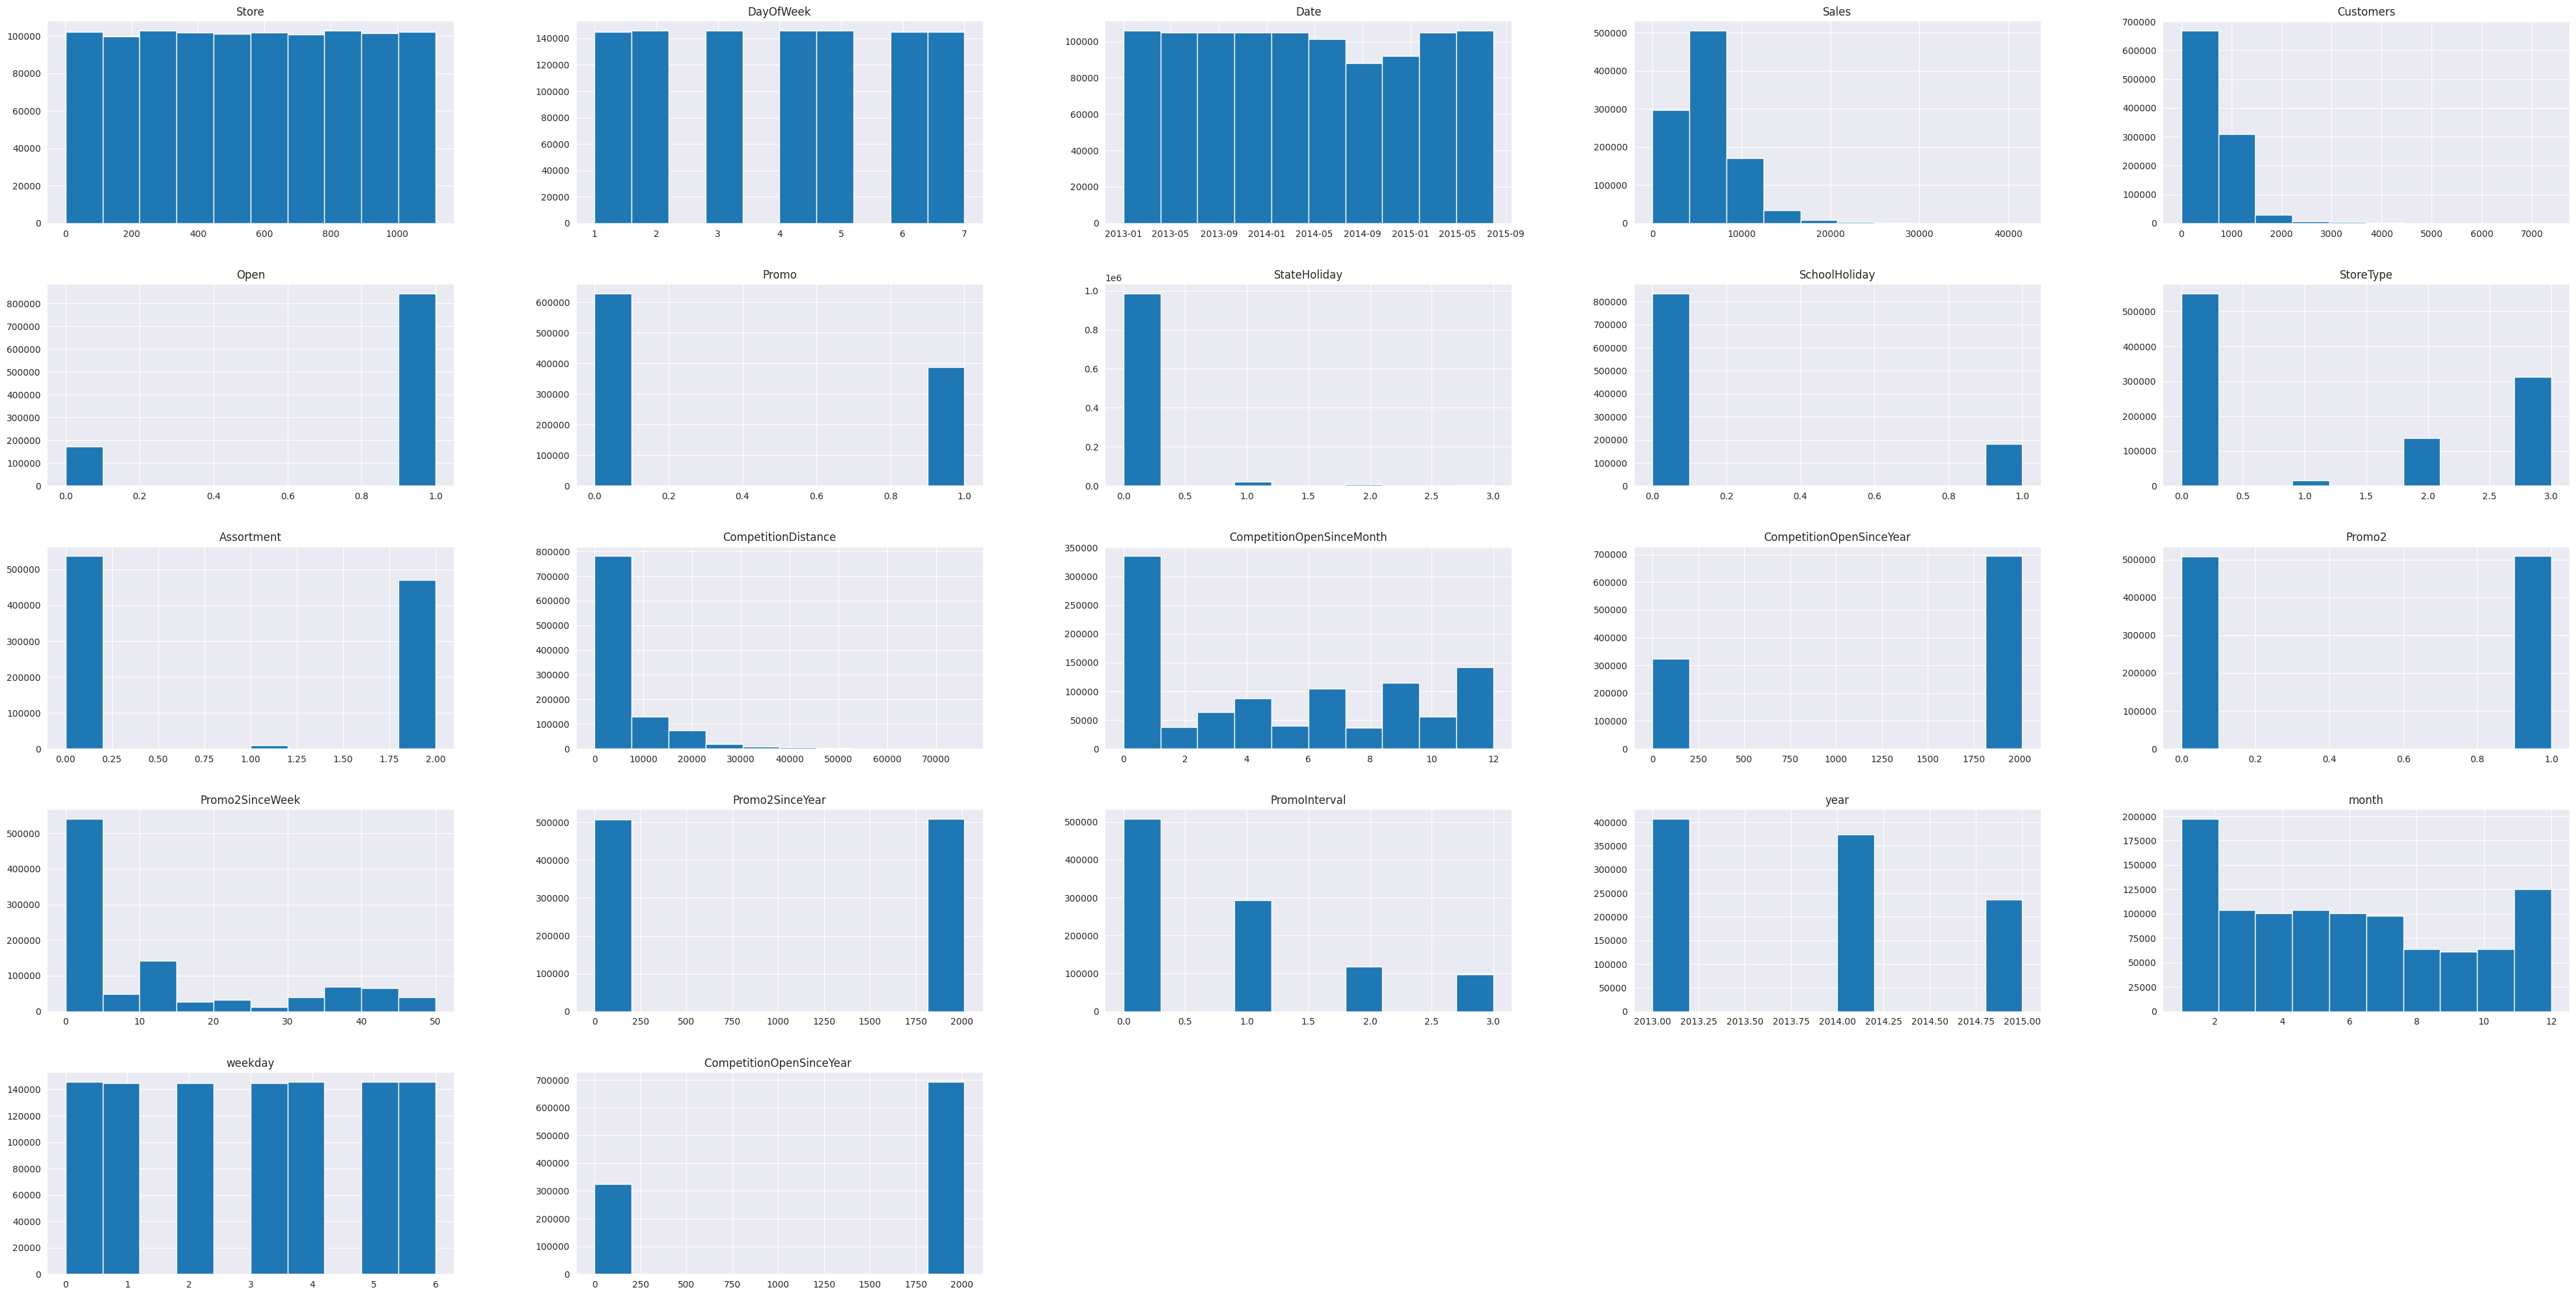

In [117]:
fig = plt.figure(figsize=(50,25))
ax = fig.gca()
train_no_null.hist(ax = ax);
# plt.show()

## Ubivariate Analysis

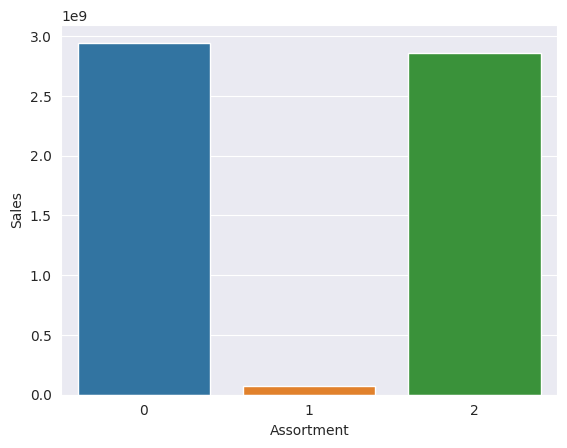

In [118]:
aux1 = train_no_null[["Assortment", "Sales"]].groupby("Assortment").sum().reset_index()
sns.barplot(x="Assortment", y="Sales", data=aux1);

# aux2 = df4[["year_week", "assortment", "sales"]].groupby(["year_week", "assortment"]).sum().reset_index()
# aux2.pivot(index="year_week", columns="assortment", values="sales").plot()

# aux3 = aux2[aux2["assortment"] == "extra"]
# aux3.pivot(index="year_week", columns="assortment", values="sales").plot()

## Feature Extraction